## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Toy Dataset

(1000, 3)
(1000, 2)
(1000,)


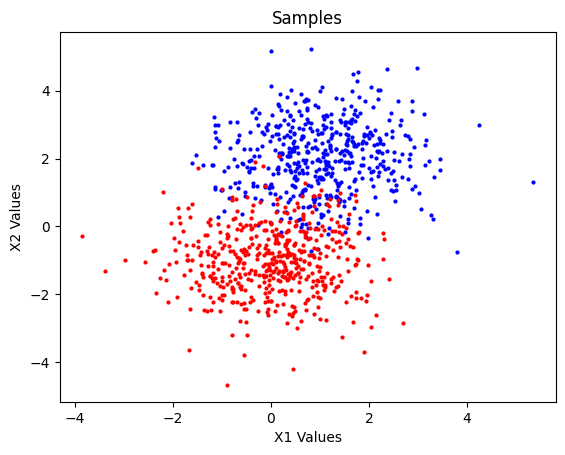

In [83]:
#### Toy Data ####

num_sample = 500

data0 = np.random.randn(num_sample,2) + (1,2)
data1 = np.random.randn(num_sample,2) + (0,-1)

# w1*x1 + w2*x2 - b = 0
data0 = np.hstack([data0,np.ones((num_sample,1),dtype=float)])
data1 = np.hstack([data1,-np.ones((num_sample,1),dtype=float)])

data = np.vstack([data0,data1])

print(data.shape)

X = data[:,:2]
Y = data[:,2]

print(X.shape)
print(Y.shape)

plt.title("Samples")
plt.xlabel("X1 Values")
plt.ylabel("X2 Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.show()

## Linear SVM

In [ ]:
class SVM:
    def __init__(self, lam, lr, X, Y):
        self.lam = lam
        self.lr = lr
        self.X = X
        self.Y = Y
        self.W = np.random.random((self.X.shape[-1], 1)) # shape : (-1,1)
        self.b = np.random.random() # shape : (1)
        self.num_data = len(self.Y)
        print("SVM initialized..")

    def predict(self, x):
        return float((x @ self.W + self.b)[0][0])

    def cal_hinge_loss(self, x, y):

        slack = np.maximum(0, 1 - y * (x @ self.W - self.b)).reshape(-1)
        hinge_loss = 0.5 * np.sum(self.W ** 2) + self.lam * np.sum(slack)
        return hinge_loss
    
    # data instance-wise loss and hit computation
    def compute_loss_and_hit(self, x, y):

        loss = self.cal_hinge_loss(x, y) # 이 단일 데이터에서의 loss를 알려주는 거임 
        hit = (y * (x @ self.W - self.b)) >= 0 # -1, 1과 무관하게 맞았으면 0이상이다. 

        return loss, hit
    
    # data instance-wise gradient computation
    def compute_gradient(self, x, y):
        
        grad_W = self.W - self.lam * x.T * y
        grad_b = self.lam * y
        
        return (grad_W, grad_b)
    
    def update_params(self, grad_W, grad_b):
        self.W -= grad_W * self.lr
        self.b -= grad_b * self.lr

    # optimize self.W with simple SGD, i.e., batch_size=1
    # also, compute total loss and training accuracy of current epoch
    def fit(self,num_epoch):
        for epoch in range(num_epoch):
            # initalize by each epoch
            total_loss = 0
            accuracy = 0
            total_hits = 0

            for ind in range(self.num_data):
                # new data
                x, y = self.X[ind,:].reshape(1,-1), self.Y[ind]

                # loss and hit 
                loss, hit = self.compute_loss_and_hit(x, y)
                total_loss += loss
                total_hits += hit
                
                # grad update 
                grad_W, grad_b = self.compute_gradient(x, y)
                self.update_params(grad_W, grad_b)

            # compute acc 
            accuracy = total_hits / self.num_data

            if epoch % 100 == 0:
                print("Epoch: %d, Loss: %.2f, Accuracy: %.3f"%(epoch, total_loss / self.num_data, accuracy))


In [84]:
model = SVM(lam=1.,lr=1e-4,X=X,Y=Y)

SVM initialized..


In [85]:
model.fit(num_epoch=500)

/var/folders/zl/ljg24f_15m93w7f2rt14c2n80000gn/T/ipykernel_1135/3204873386.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epoch: %d, Loss: %.2f, Accuracy: %.3f"%(epoch, total_loss / self.num_data, accuracy))


Epoch: 0, Loss: 0.83, Accuracy: 0.907
Epoch: 100, Loss: 1.43, Accuracy: 0.940
Epoch: 200, Loss: 1.43, Accuracy: 0.940
Epoch: 300, Loss: 1.43, Accuracy: 0.940
Epoch: 400, Loss: 1.43, Accuracy: 0.940


In [86]:
# x 좌표 범위 설정
x1_vals = np.array([-4, 4])

# 모델의 결정경계는 w1 * x + w2 * y - b = 0이므로,
# y = (w1 * x - b) / -w2

w = model.W  # weight 벡터
b = model.b  # bias (스칼라)

# 계산된 y 값
x2_vals = (w[0] * x1_vals - b) / (-w[1])

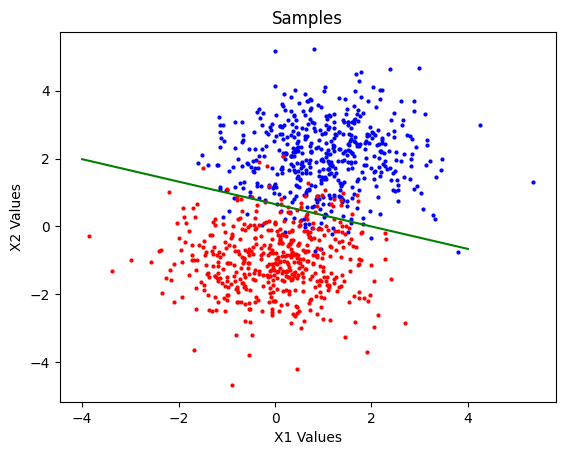

In [87]:
# draw the optimized linear decision boundary
plt.title("Samples")
plt.xlabel("X1 Values")
plt.ylabel("X2 Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.plot(x1_vals, x2_vals, color="g")
plt.show()


## 추가 과제 : 복잡한 데이터 (ex XOR 데이터)
> 데이터만 수정하면 되는거니 로직 자체를 바꿀 필요는 없어 

유명한 kernel - feature map 페어를 조사해서 간단한 거를 적용해보기  
feature mapping을 하고 안하고 어떤 차이가 있는지  